In [ ]:
!pip install yfinance
!pip install networkx
!pip install cvxpy

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
import numpy as np
import yfinance as yf
import math
import networkx as nx

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
stocks = os.listdir("/content/drive/MyDrive/Classroom/StreamProject")

nifty50 = "/content/drive/MyDrive/Classroom/StreamProject/"
print(stocks)
print(len(stocks))

['ADANIENT.NS.csv', 'INDUSINDBK.NS.csv', 'AXISBANK.NS.csv', 'ICICIBANK.NS.csv', 'ULTRACEMCO.NS.csv', 'SUNPHARMA.NS.csv', 'ONGC.NS.csv', 'CIPLA.NS.csv', 'APOLLOHOSP.NS.csv', 'HCLTECH.NS.csv', 'BAJAJ-AUTO.NS.csv', 'HINDALCO.NS.csv', 'WIPRO.NS.csv', 'INFY.NS.csv', 'HINDUNILVR.NS.csv', 'ASIANPAINT.NS.csv', 'HEROMOTOCO.NS.csv', 'M&M.NS.csv', 'TITAN.NS.csv', 'HDFCBANK.NS.csv', 'EICHERMOT.NS.csv', 'TATASTEEL.NS.csv', 'BRITANNIA.NS.csv', 'HDFC.NS.csv', 'LT.NS.csv', 'GRASIM.NS.csv', 'RELIANCE.NS.csv', 'BPCL.NS.csv', 'ITC.NS.csv', 'DABUR.NS.csv']
30


In [ ]:
# Industries

banking_and_finance = ['INDUSINDBK.NS', 'AXISBANK.NS', 'ICICIBANK.NS', 'HDFCBANK.NS', 'HDFC.NS']
industries = ['GRASIM.NS', 'ULTRACEMCO.NS', 'HINDALCO.NS', 'ASIANPAINT.NS', 'TATASTEEL.NS', ]
auto = ['M&M.NS', 'BAJAJ-AUTO.NS', 'HEROMOTOCO.NS', 'EICHERMOT.NS']
consumer_goods = ['DABUR.NS', 'HINDUNILVR.NS', 'TITAN.NS', 'BRITANNIA.NS', 'ITC.NS']
software = ['HCLTECH.NS', 'WIPRO.NS', 'INFY.NS', 'LT.NS']
power_and_energy = ['ONGC.NS', 'RELIANCE.NS', 'BPCL.NS']
health_and_pharma = ['SUNPHARMA.NS', 'CIPLA.NS', 'APOLLOHOSP.NS']
misc = ['ADANIENT.NS']

sectors = [banking_and_finance, industries, auto, consumer_goods, software, power_and_energy, health_and_pharma, misc]
sector_names = ["banking_and_finance", "industries", "auto", "consumer_goods", "software", "power_and_energy", "health_and_pharma", "misc"]

In [ ]:
# Creating a string of dates from random file

ITC = pd.read_csv(filepath_or_buffer = (nifty50 + "ITC.NS.csv"), index_col = "Date")

date = ITC.index
#print(type(date))
date = date.to_numpy()
print(date)

['2002-12-23' '2002-12-24' '2002-12-25' ... '2022-12-16' '2022-12-19'
 '2022-12-20']


In [ ]:
idx = "s0" # creating the variables for the stock indices
idx = np.array(idx)

for i in range(1, len(stocks)):
    idx1 = "s" + str(i)
    idx = np.append(idx, idx1)

print(idx)
print(idx.shape)

['s0' 's1' 's2' 's3' 's4' 's5' 's6' 's7' 's8' 's9' 's10' 's11' 's12' 's13'
 's14' 's15' 's16' 's17' 's18' 's19' 's20' 's21' 's22' 's23' 's24' 's25'
 's26' 's27' 's28' 's29']
(30,)


In [ ]:
# Finding the value of first  using the path of the file

path = nifty50 + stocks[0]
myStr = idx[0]

df = pd.read_csv(filepath_or_buffer = path, index_col = "Date")
df = df.Close
df[2814] = df[2813]
df = df.fillna(method = "ffill")
arr = df.to_numpy()
# arr = np.round(arr, 2)
arr = np.expand_dims(arr, axis = 0) # Expanding dimensions from 1 to 2

# Converting it to variable s0

vars().__setitem__(myStr, arr)

close = s0 # Array that will contain all the closing prices

for file in range(1, len(stocks)): # Parsing the length of the directory
    path = nifty50 + stocks[file]
    myStr = idx[file]

    df = pd.read_csv(filepath_or_buffer = path, index_col = "Date")

    df = df.Close
    df[2814] = df[2813]
    df = df.fillna(method = "ffill")
    arr = df.to_numpy()
    arr = np.round(arr, 2)
    arr = np.expand_dims(arr, axis = 0)

    close = np.concatenate((close, arr), axis = 0)

    vars().__setitem__(myStr, arr)


print(close.shape)

(30, 4972)


In [ ]:
returns = np.empty(close.shape) # Creating an empty array to store returns

for i in range(close.shape[0]): # Using a loop function to find the relative change in stock price using r(t) = ln{P(t)} - ln{P(t - 1)}
    for j in range(1, close.shape[1]):
        returns[i][j] = math.log(close[i][j]) - math.log(close[i][j - 1])

rel_returns = np.delete(returns, 0, axis = 1) # Removing first column for j = 0

rel_returns[np.isnan(rel_returns)] = 0

print(rel_returns)

[[-0.01236212  0.          0.00757307 ... -0.01568966  0.02346156
   0.02184388]
 [ 0.02454111  0.         -0.01526747 ... -0.0081405  -0.00489178
   0.00415954]
 [ 0.00806921  0.         -0.00345026 ... -0.00325638  0.01180049
   0.00374483]
 ...
 [ 0.00170358  0.          0.01212478 ... -0.02142215 -0.00131762
  -0.00308121]
 [-0.00744504  0.         -0.00067958 ... -0.01112854  0.01598613
  -0.00102843]
 [ 0.00272109  0.          0.00271371 ... -0.01225747  0.01591409
  -0.01634541]]


In [ ]:
print(rel_returns[5][110])

-0.005956830719191508


In [ ]:
T = 1000
delT = 21

# Defining the window size and window step size

In [ ]:
# Calculating PCT Change to evaluate expected returns
expected_ret = np.empty((30, 195))
epsilon = 1e-06

for file in range(len(stocks)):
    path = nifty50 + stocks[file]
    myStr = idx[file]

    df = pd.read_csv(filepath_or_buffer = path, index_col = "Date")
    df = df.Close
    df[2814] = df[2813]
    df.fillna(method = "ffill")
    window_size = 1000
    ctr = 0

    for j in range(0, len(df)-window_size, delT):
        expected_ret[file][ctr] = (df[j+window_size] - df[j])/(df[j])
        ctr+=1

expected_ret[np.isnan(expected_ret)] = 0
expected_ret = expected_ret[:, :190]
print(expected_ret.shape)

(30, 190)


In [ ]:
max_return = np.percentile(expected_ret, 90)
min_return = np.min(expected_ret)

print(max_return)
print(min_return)

theta = 0.3
print((1-theta) * min_return + theta * max_return)

3.1772012321800607
-0.6622270024265301
0.4896014679554471


In [ ]:
def roll_avg(a):  # Function to calculate the average of a given array
    return np.mean(a)

def correl(a, b):  # Function to find the correlation between two given windows of stock price
    ab = a * b
    a2 = a ** 2
    b2 = b ** 2

    num = roll_avg(ab) - (roll_avg(a) * roll_avg(b))
    den = math.sqrt((roll_avg(a2) - (roll_avg(a) ** 2))
    * (roll_avg(b2) - (roll_avg(b) ** 2)))

    cor = num / den

    return cor

In [ ]:
# Empty correlation symmetric matrix with dim0 as time interval

corr = np.empty((195, 30, 30))

for i in range(195):
    for j in range(30):
        corr[i][j][j] = 1 # A stock index is perfectly correlated to itself

In [ ]:
def correlation_arr(a, corr, t):
    n = a.shape[0]

    for i in range(n):
        for j in range(i + 1, n):
            corr[t][i][j] = correl(a[i], a[j])
            corr[t][j][i] = corr[t][i][j]

    return corr

In [ ]:
# Creating the time windows t using T and delT

t = 0

for i in range(0, rel_returns.shape[1], delT):
    # Shape of close = (30, 4972)

    if(i + T > rel_returns.shape[1]):
        break

    windows = rel_returns[:, i:i+T]

    corr = correlation_arr(windows, corr, t)

    t += 1

M = t

In [ ]:
print(corr.shape)

(195, 30, 30)


In [ ]:
# Removing rows which do not correspond to any corelation values
rho = corr[:190, :, :]

print(rho.shape)

(190, 30, 30)


In [ ]:
dist = np.empty(rho.shape)

dist = (2 * (1 - rho)) ** (1/2) # Calculating the distance between two stock indices
print(dist.shape)

# dist is the symmetric distance matrix between the 30 stocks

(190, 30, 30)


In [ ]:
graphs = [] # Defining a list to store all of the graphs

for i in range(dist.shape[0]):
    graph = nx.from_numpy_array(dist[i, :, :]) # Creating a graph from the distance array
    graphs.append(graph) # Appending the graph to the list of graphs

print(graphs[0])

Graph with 30 nodes and 435 edges


# Minimum Spanning Tree

In [ ]:
T = [] # List to store all spanning trees

for i in range(len(graphs)):
    spanning_tree = nx.minimum_spanning_tree(G = graphs[i], algorithm = 'prim', ignore_nan = True) # Spanning Tree for ith graph
    T.append(spanning_tree) # Appending the spanning tree to the list of spanning trees

print(T[0])

Graph with 30 nodes and 29 edges


In [ ]:
sorted(T[0].edges(data=False))

[(0, 20),
 (1, 2),
 (1, 8),
 (1, 18),
 (2, 19),
 (3, 6),
 (3, 19),
 (4, 11),
 (5, 12),
 (6, 26),
 (7, 13),
 (9, 12),
 (9, 21),
 (10, 14),
 (10, 16),
 (11, 28),
 (12, 13),
 (12, 15),
 (12, 19),
 (12, 24),
 (12, 28),
 (14, 28),
 (17, 25),
 (19, 23),
 (20, 25),
 (22, 25),
 (25, 26),
 (25, 27),
 (28, 29)]

In [ ]:
def getMaxValue(ctr, maxVal):
    for i in range(ctr.size):
        if ctr[i] == maxVal:
            return i
        else:
            continue

In [ ]:
center = [] # Collecting the central vertex (stock) in a list
roots = []

stocks = [sub[:-7] for sub in stocks]

for i in range(len(T)):
    ctr = np.zeros(30)
    e = sorted(T[i].edges(data = False))

    for j in range(len(e)):
        ctr[e[j][0]] += 1
        ctr[e[j][1]] += 1

    index = getMaxValue(ctr, max(ctr))

    center.append(stocks[index])
    roots.append(index)

In [ ]:
# Dominant stocks in the market sorted in descending order of dominance

dom_stocks = sorted(center, key = center.count, reverse = True)

In [ ]:
# Evaluating distance of the tree nodes from the root node for all 190 MSTs
distances = []

for t in range(len(T)):
    shortest_path_lengths = nx.shortest_path_length(T[t], roots[t])
    distances.append(shortest_path_lengths)

print(len(distances))

# Converting the distances dictionary into an array with the index of the array representing the node
level = np.empty((190, 30))

for i in range(len(distances)):
    for j in range(len(stocks)):
        level[i][j] = distances[i][j]

print(level[3])

190
[6. 3. 2. 2. 3. 1. 3. 2. 4. 1. 3. 2. 0. 1. 2. 1. 4. 6. 4. 1. 6. 2. 6. 2.
 1. 5. 4. 6. 1. 4.]


In [ ]:
import cvxpy as cp

weights = np.empty((190, 30))
weights_low = np.empty((190, 30))
weights_high = np.empty((190, 30))

theta = 0.08
target_low = (1-theta) * min_return + theta * max_return
theta = 0.52
target_avg = (1-theta) * min_return + theta * max_return
theta = 0.84
target_high = (1-theta) * min_return + theta * max_return

for i in range(len(distances)):
    cov = rho[i]
    mu = expected_ret[:, i]
    x = cp.Variable(30)
    objective = cp.Minimize(cp.quad_form(x, cov))

    constraints_low = [
        x >= 0,
        cp.sum(x) == 1,
        cp.sum(mu.T @ x) >= target_low,
        cp.sum(mu.T @ x) <= target_avg
    ]

    constraints_avg = [
        x >= 0,
        cp.sum(x) == 1,
        cp.sum(mu.T @ x) >= target_avg
    ]

    constraints_high = [
        x >= 0,
        cp.sum(x) == 1,
        cp.sum(mu.T @ x) >= target_high
    ]

    problem = cp.Problem(objective, constraints_avg)
    problem.solve()
    weights[i] = x.value

    problem = cp.Problem(objective, constraints_low)
    problem.solve()
    weights_low[i] = x.value

    problem = cp.Problem(objective, constraints_high)
    problem.solve()
    weights_high[i] = x.value

print(weights[150])
print(weights_low[150])
print(weights_high[150])

[ 1.14857942e-01  1.12388614e-22  1.18550118e-22  5.10323244e-23
  5.03998815e-23  2.71838942e-03  1.42687169e-22  7.95124593e-23
  6.01541814e-02  6.39575033e-02 -1.44530439e-23  6.69408829e-23
  5.22691399e-02  7.22780722e-02  6.77839739e-02  3.86102453e-03
  1.29541356e-22  7.01472712e-23  2.09789466e-01  2.33911647e-23
  1.16045583e-22  8.10160042e-23  3.75878371e-02  1.64741767e-01
  4.18140632e-23  4.19429796e-23  1.11058856e-01  2.87409618e-02
  8.31604543e-03  1.88484102e-03]
[ 1.32460920e-02  1.67636816e-02  3.48664544e-02  5.70177139e-03
 -4.37391197e-23  8.83789519e-02  3.61596235e-02  3.39786371e-02
  9.48715073e-02  9.40610488e-02  1.00884586e-02  1.05548529e-22
  7.45089858e-02  6.12262381e-02  4.54626563e-02  1.15057192e-02
  8.44191700e-03 -4.22995192e-23  6.22323282e-02  5.02465455e-23
  2.14160831e-02 -9.30382278e-23  3.03938632e-02  7.71711238e-02
  1.08030397e-22  1.67955117e-03  2.11995696e-02  7.89041396e-02
  5.25644508e-02  2.51771476e-02]
[nan nan nan nan nan n

In [ ]:
print(expected_ret[:, 150] @ weights[150])

0.4896014679554469


In [ ]:
# Computing the weighted portfolio layer
wt_layer = np.empty(190)
wt_layer_low = np.empty(190)
wt_layer_high = np.empty(190)

for i in range(len(distances)):
    wt_layer[i] = weights[i] @ level[i].T
    wt_layer_low[i] = weights_low[i] @ level[i].T
    wt_layer_high[i] = weights_high[i] @ level[i].T

print(np.nanmean(wt_layer_low))
print(np.nanmean(wt_layer_high))

3.080685956550603
2.977829160477921


# Visualization

In [ ]:
graphs_nodes = {}

for i in range(len(stocks)):
    graphs_nodes[i] = stocks[i]

for i in range(len(T)):
    nx.set_node_attributes(T[i], graphs_nodes, 'label')

GRASIM


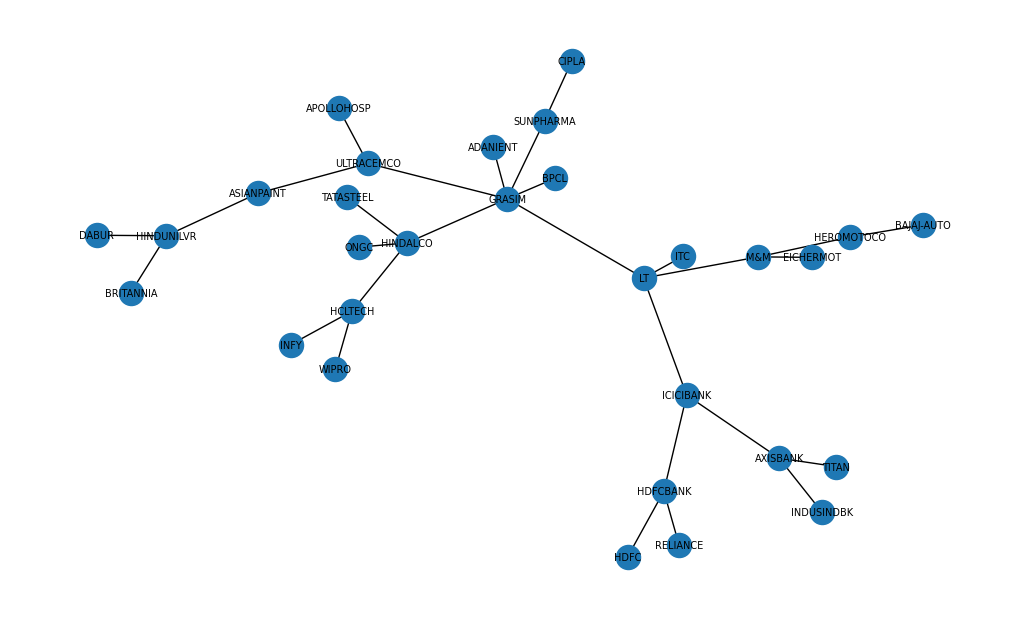

In [ ]:
fig = plt.figure(figsize = (10, 6))
tree = T[189]
print(center[189])
pos = nx.spring_layout(tree)
nx.draw(tree, pos)
nx.draw_networkx_labels(tree, pos, graphs_nodes, font_size=7, font_color='black')
plt.show()

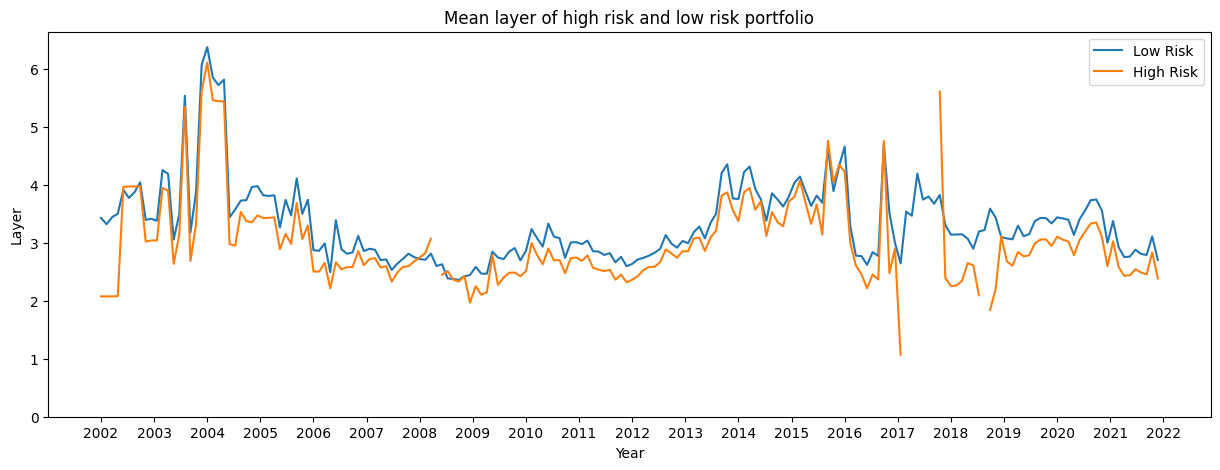

In [ ]:
fig = plt.figure(figsize = (15, 5))

#x = range(190)
#y = wt_layer
#plt.plot(x, y)

x = range(190)
y = wt_layer_low + 0.25
plt.plot(x, y, label = "Low Risk")

x = range(190)
y = wt_layer_high
plt.plot(x, y, label = "High Risk")

xticks_per_year = 190/20
xticks = [i * xticks_per_year for i in range(21)]
plt.xticks(xticks, range(2002, 2023, 1))
plt.ylim(0)

plt.xlabel("Year")
plt.ylabel("Layer")

plt.legend()
plt.title("Mean layer of high risk and low risk portfolio")

plt.show()